In [2]:
from metrics import load_json_from_file, Metrics, FileHandler
import numpy as np
import matplotlib.pyplot as plt

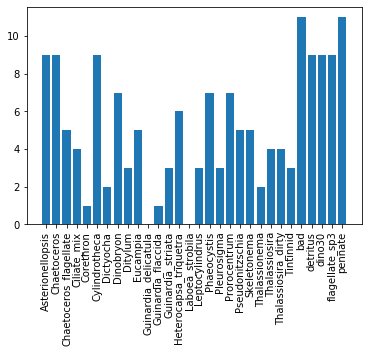

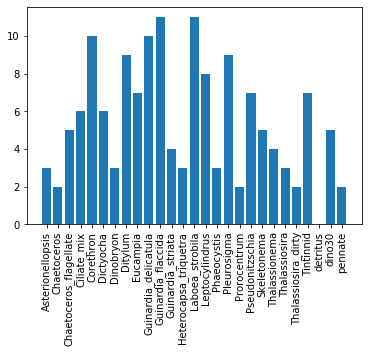

In [10]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.128.json")

dropped_train = FileHandler(stats['Train_dropped_fnames'])
notD_train = FileHandler(stats['Train_fnames'])

dropped_train.plot_counts()
notD_train.plot_counts()

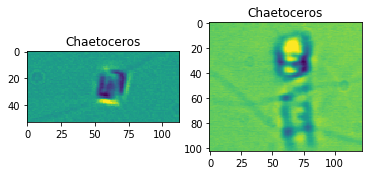

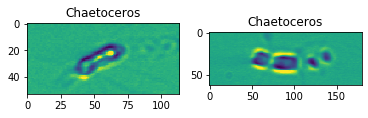

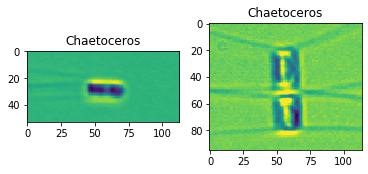

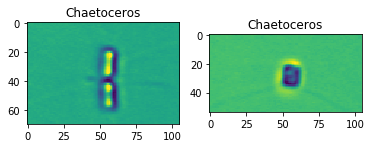

~~~~~~~~~~~~~~~


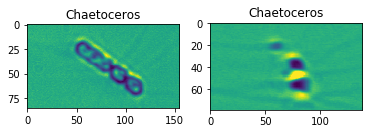

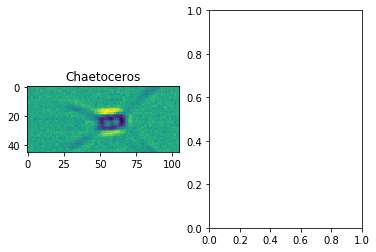

In [9]:
dropped_train.sample(8, "Chaetoceros")

print("~~~~~~~~~~~~~~~")
notD_train.sample(3, "Chaetoceros")

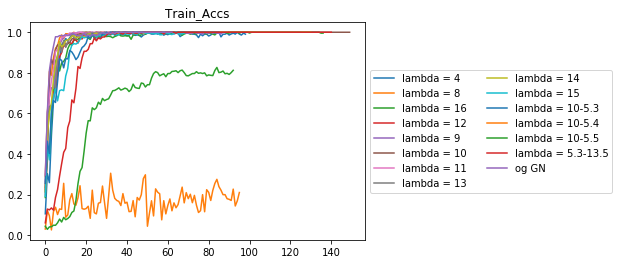

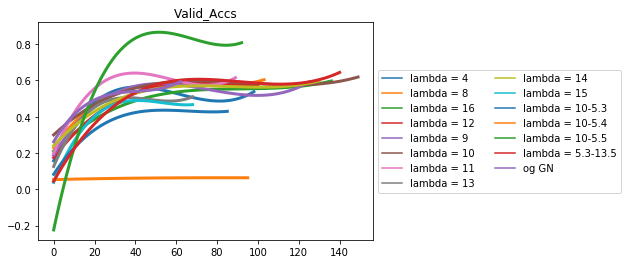

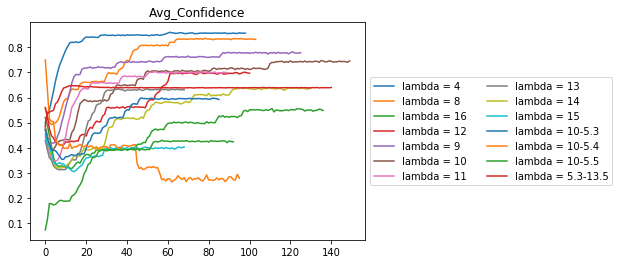

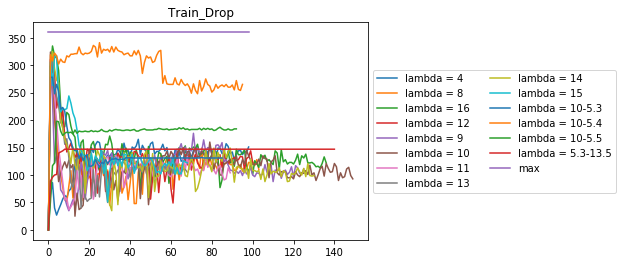

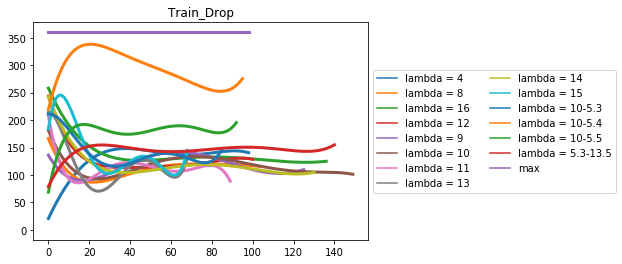

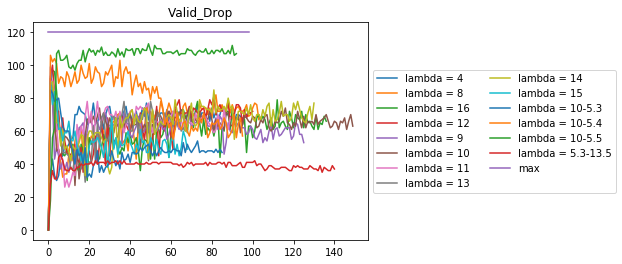

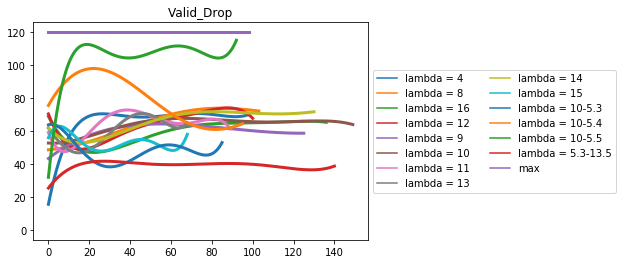

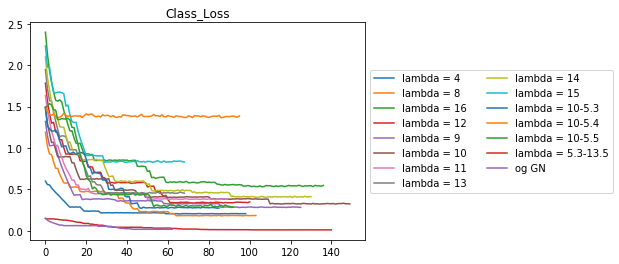

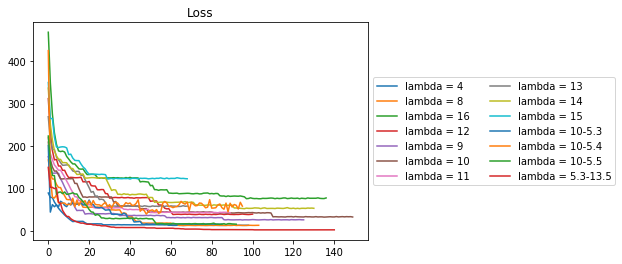

In [31]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.2-13.121.json"
fname = [name.replace("121",str(i)) for i in range(122,125)]
fname.extend([name.replace("121",str(i)) for i in range(126, 130)])
fname.extend([name.replace("121",str(i)) for i in range(1211, 1214)])

fname.append(gn_53_13128)
fname.append(gn_53_13128.replace("_5.3", "_5.4"))
fname.append(gn_53_13128.replace("_5.3", "_5.5"))
fname.append(gn_53_13128.replace("-13.128", "-13.5"))

lambdas = [4,8,16,12,9,10,11,13,14,15, "10-5.3", "10-5.4", "10-5.5", "5.3-13.5"]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(lambdas[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(lambdas[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(lambdas[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(lambdas[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [20*30*0.6 for x in range(len(train_drop['lambda = '+str(lambdas[0])]))]

valid_drop = {"lambda = "+str(lambdas[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [20*30*0.2 for x in range(len(valid_drop['lambda = '+str(lambdas[0])]))]

class_loss = {"lambda = "+str(lambdas[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(lambdas[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

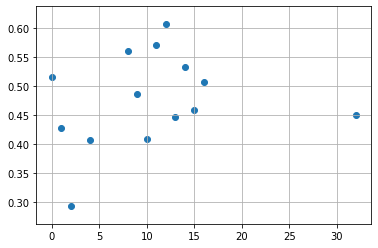

In [24]:
y = [stats['TestAcc'] for stats in gns]
y.pop()
y.append(gn_12_441['TestAcc'])
x = lambdas.copy()
x.pop()
x.append(0)

plt.scatter(x,y)
plt.grid(b=True, which='both')

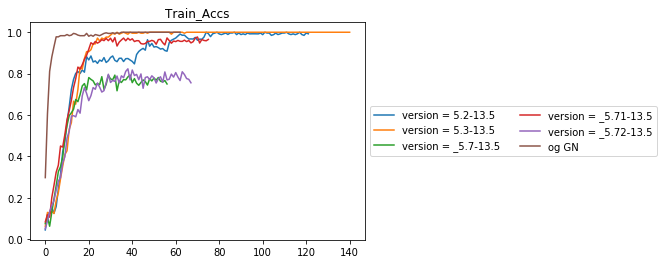

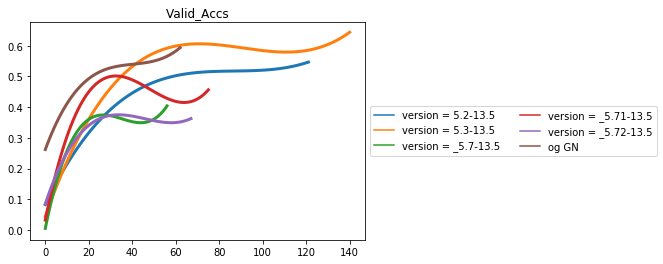

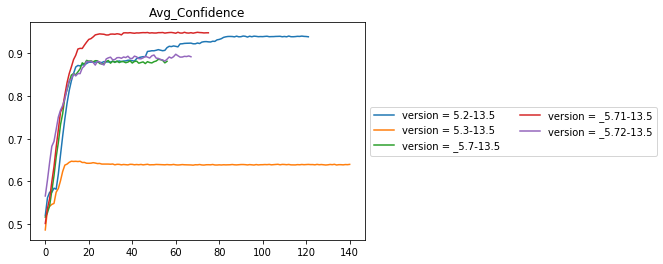

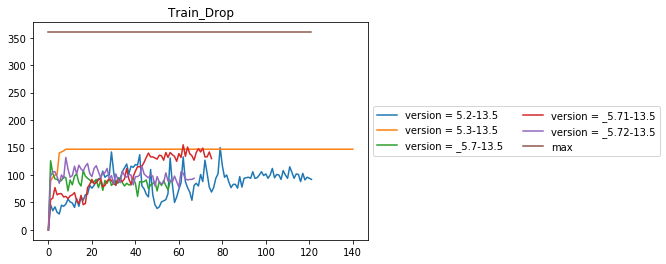

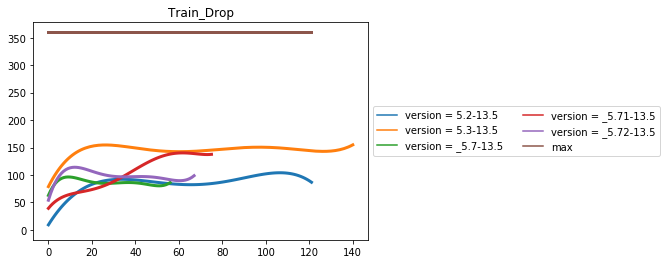

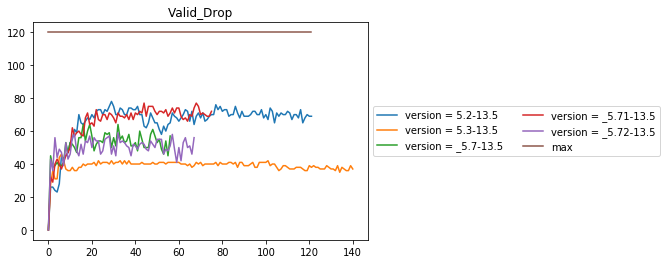

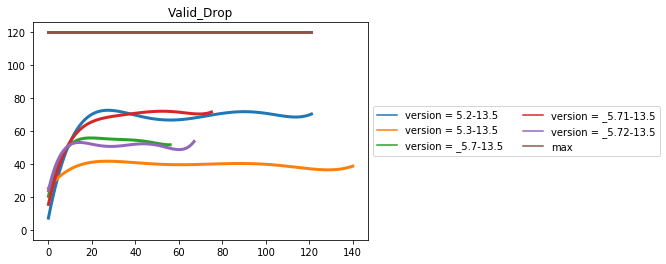

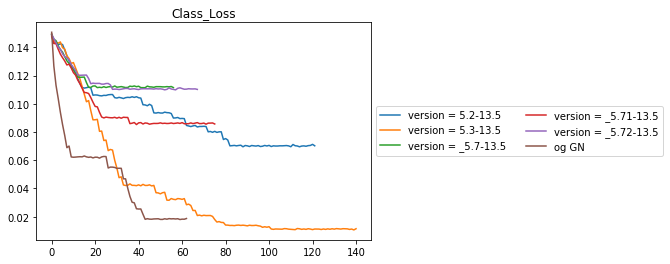

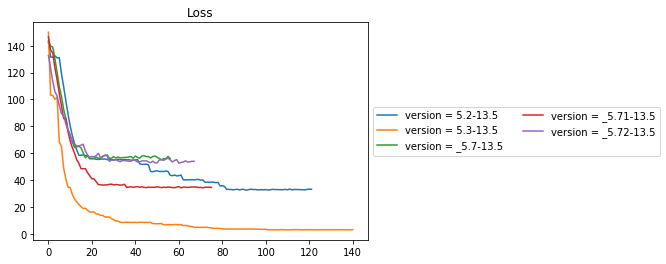

5.2-13.5 test acc: 0.5263157894736842
5.2-13.5 Test dropped: 82 / 120.0
5.3-13.5 test acc: 0.5
5.3-13.5 Test dropped: 38 / 120.0
_5.7-13.5 test acc: 0.28
_5.7-13.5 Test dropped: 70 / 120.0
_5.71-13.5 test acc: 0.2564102564102564
_5.71-13.5 Test dropped: 81 / 120.0
_5.72-13.5 test acc: 0.25
_5.72-13.5 Test dropped: 52 / 120.0


In [30]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
name = "stats/stats-GoogleNet_5.2-13.5.json"
fname = [name.replace("_5.2", i) for i in ["_5.2", "_5.3","_5.7","_5.71","_5.72"]]
version = ["5.2-13.5", "5.3-13.5","_5.7-13.5","_5.71-13.5","_5.72-13.5"]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"version = "+str(version[i]): gns[i]['TrainAcc'] for i in range(len(gns))}
Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"version = "+str(version[i]): gns[i]['ValidAcc'] for i in range(len(gns))}
Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"version = "+str(version[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"version = "+str(version[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [20*30*0.6 for x in range(len(train_drop['version = '+str(version[0])]))]

valid_drop = {"version = "+str(version[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [20*30*0.2 for x in range(len(valid_drop['version = '+str(version[0])]))]

class_loss = {"version = "+str(version[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"version = "+str(version[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

for i in range(len(gns)):
    print(version[i], "test acc:", gns[i]["TestAcc"])
    print(version[i],"Test dropped:", len(gns[i]['Test_dropped_fnames']),"/", 20*30*0.2)


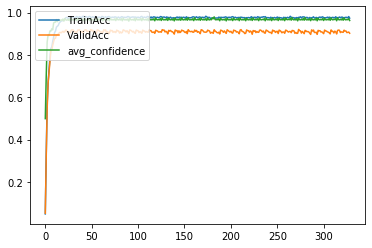

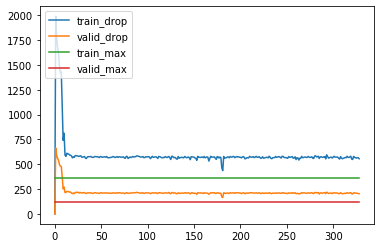

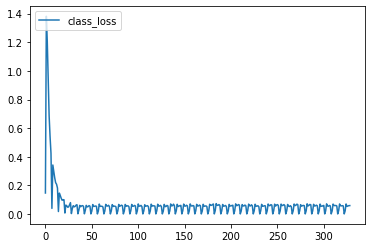

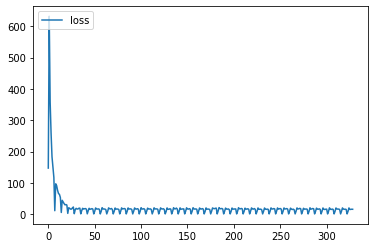

testAcc 0.9129583481666074
Test dropped: 212 / 120.0


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.52.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)

print("Test dropped:", len(stats['Test_dropped_fnames']),"/", 20*30*0.2)

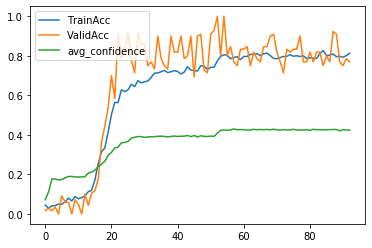

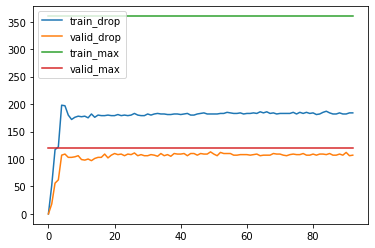

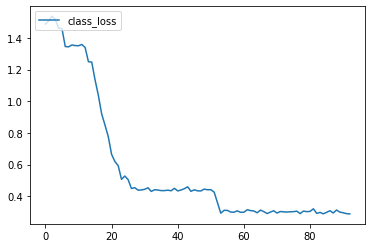

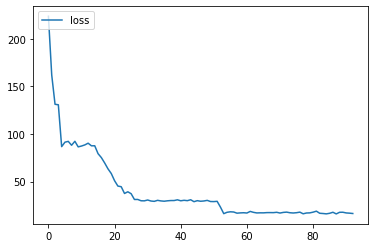

testAcc 0.8571428571428571


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.128.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


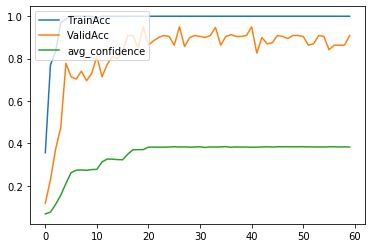

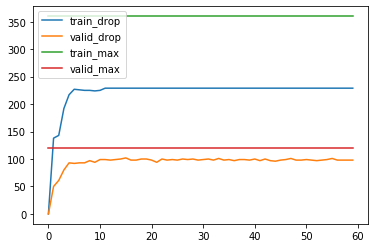

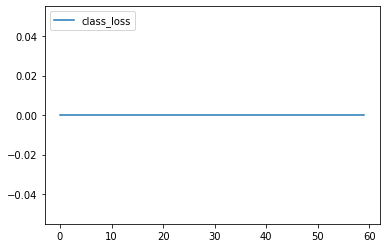

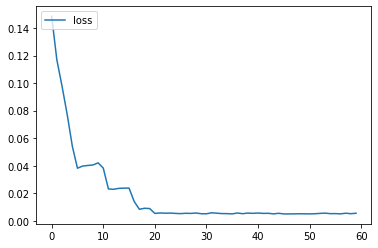

testAcc 0.4666666666666667


In [12]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.4.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


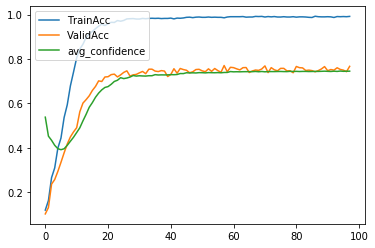

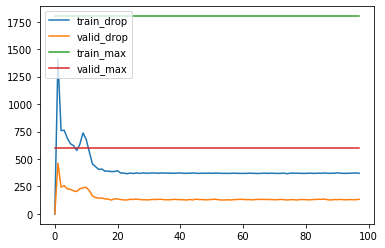

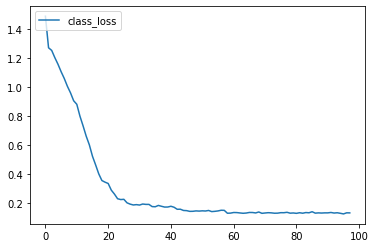

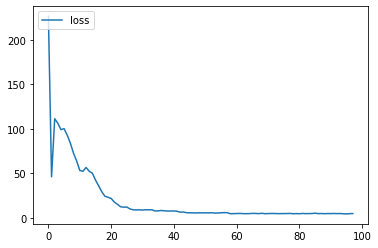

testAcc 0.7801268498942917


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.3.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [100*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [100*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


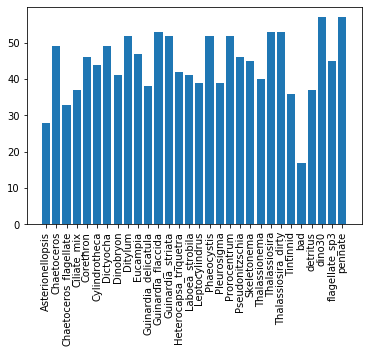

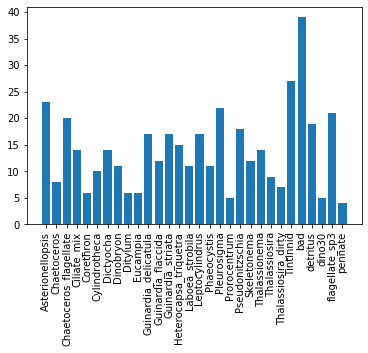

In [ ]:
dropped_train.sample()

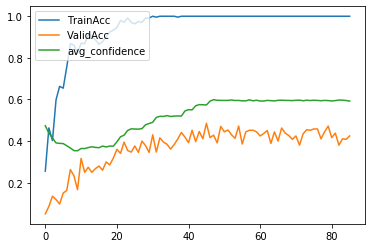

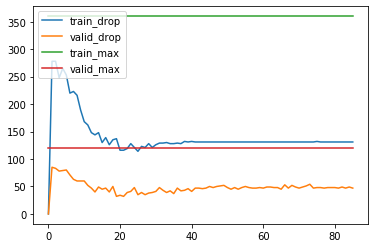

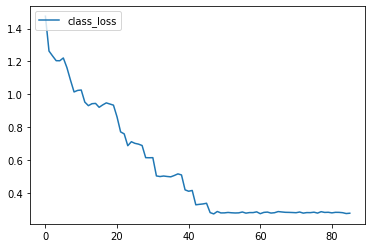

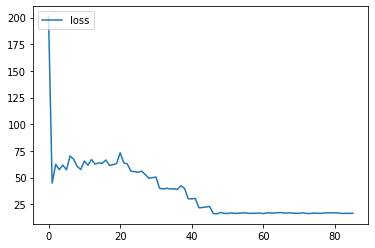

testAcc 0.46153846153846156


In [13]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.128.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


In [ ]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.12-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

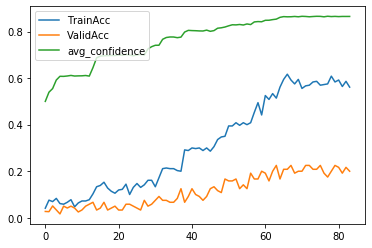

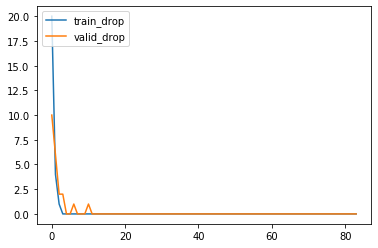

In [7]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.13-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

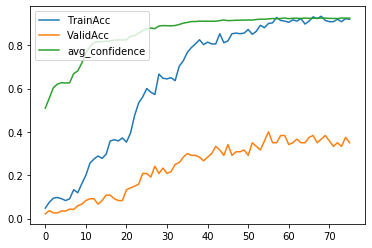

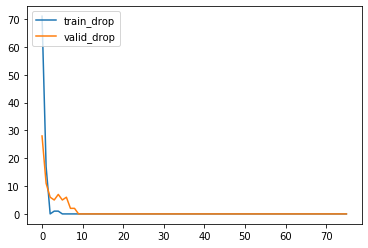

In [8]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.14-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

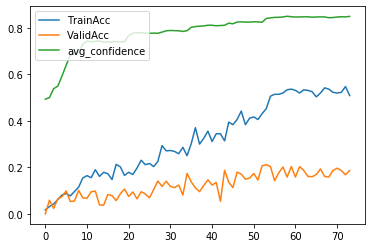

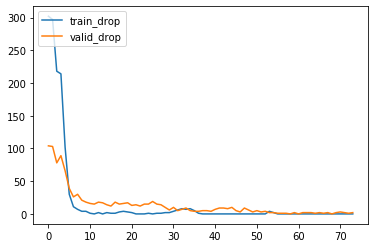

In [9]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.15-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

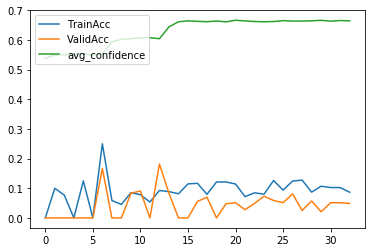

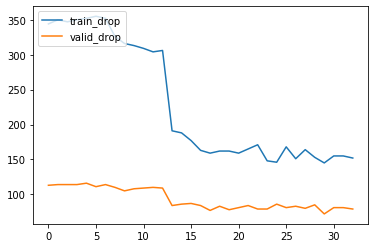

In [11]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.16-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

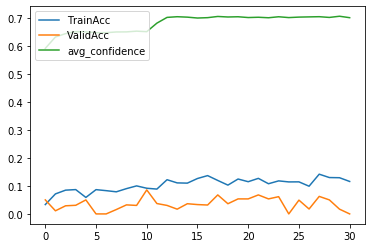

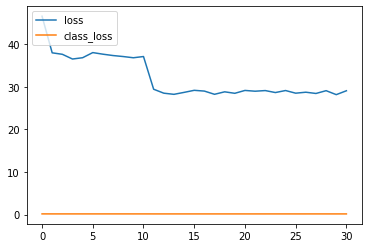

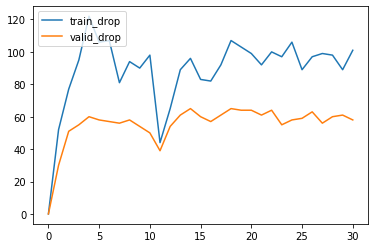

In [19]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

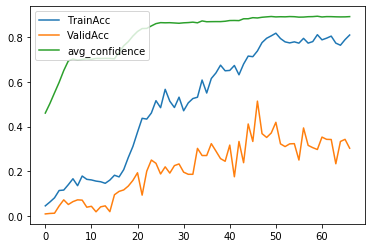

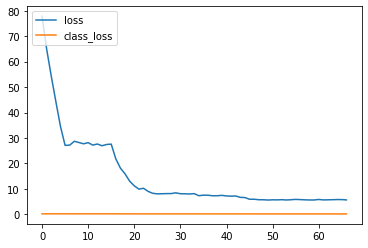

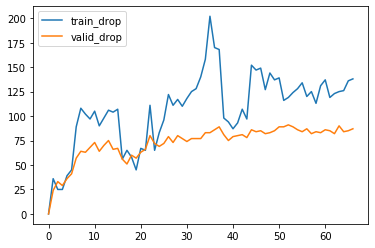

In [21]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

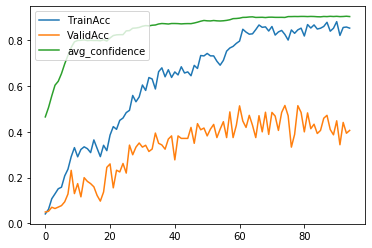

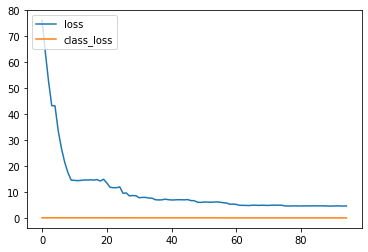

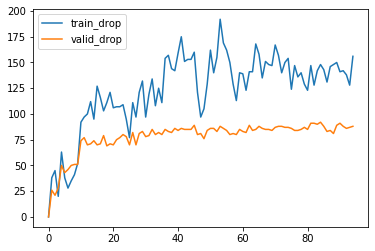

In [22]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

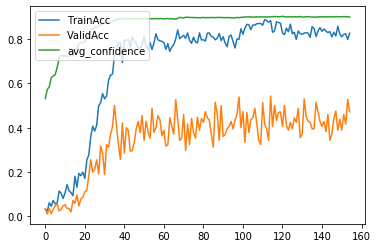

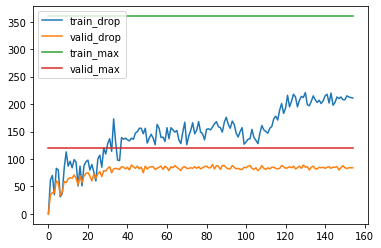

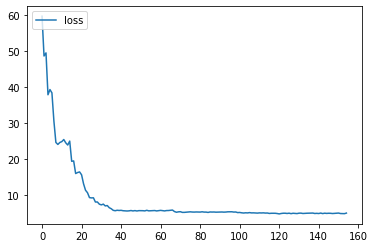

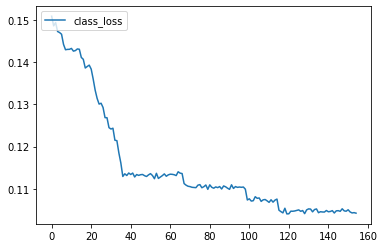

In [29]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.12.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

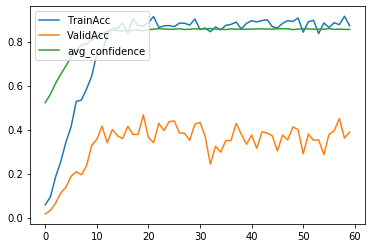

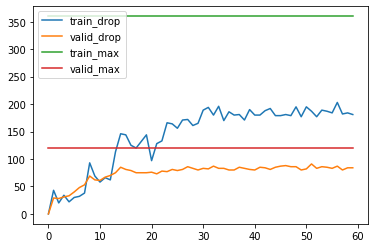

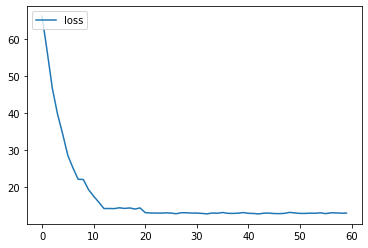

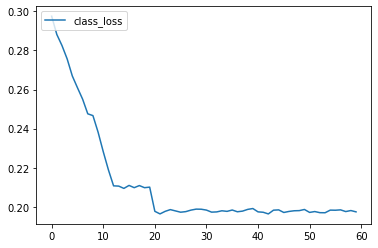

In [30]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.121.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

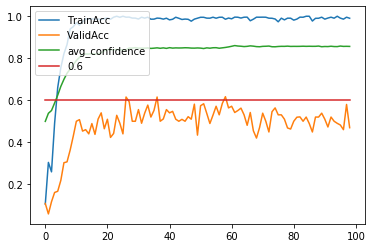

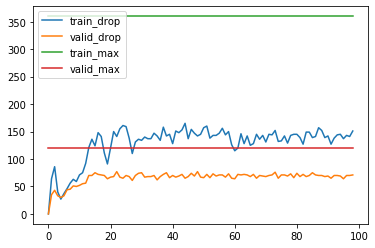

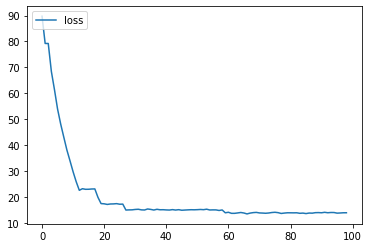

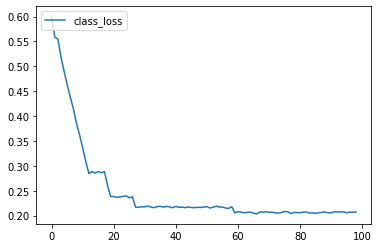

In [37]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.122.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

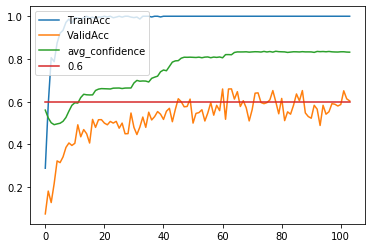

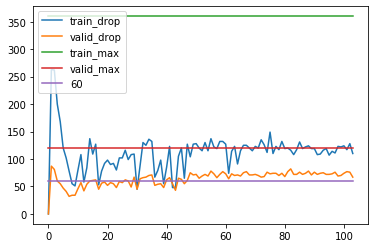

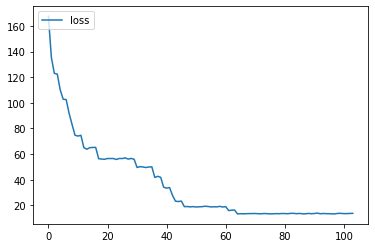

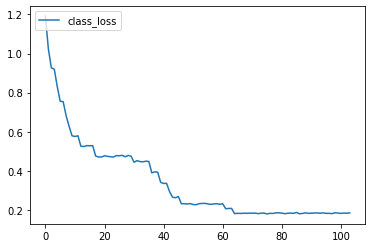

In [41]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.123.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]
drops['60'] = [60 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

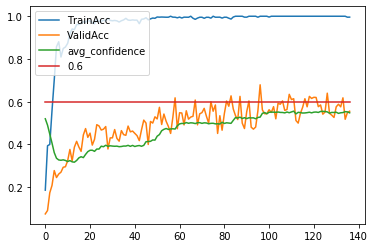

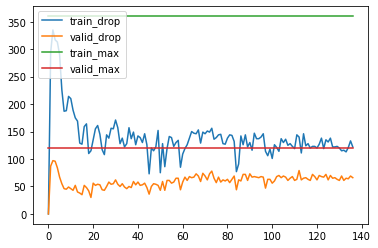

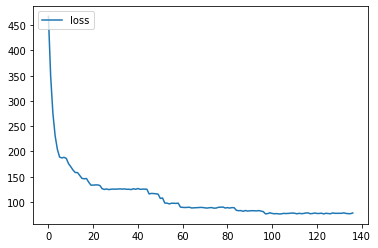

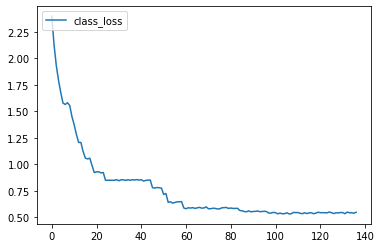

In [39]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.124.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

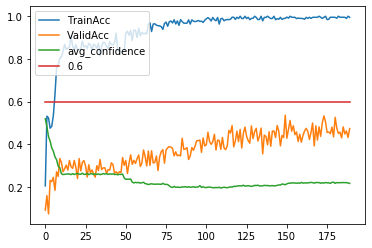

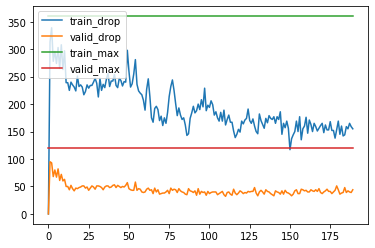

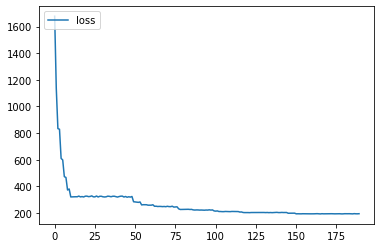

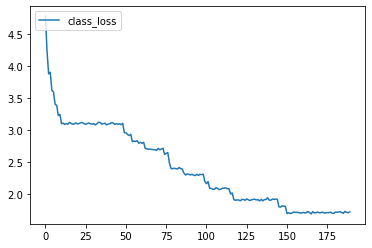

In [40]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.125.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

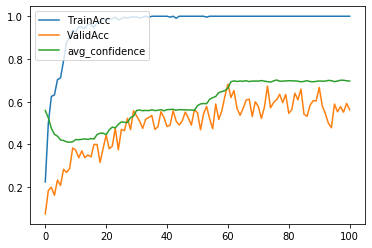

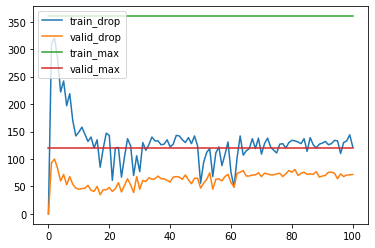

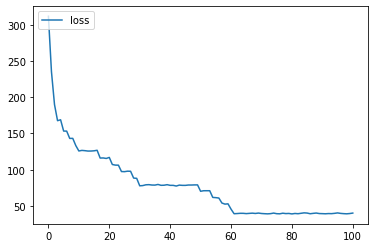

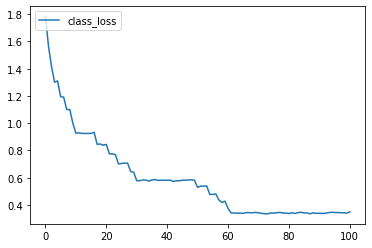

In [35]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.126.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

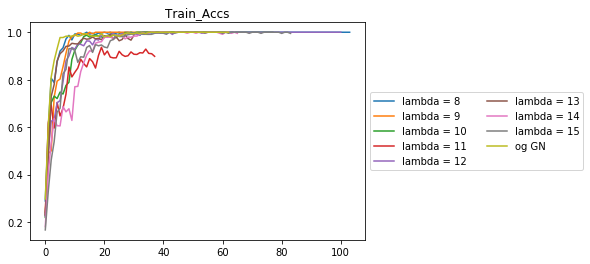

/Users/saadghani/Development/miniconda3/envs/URFP_Plankton/lib/python3.7/site-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


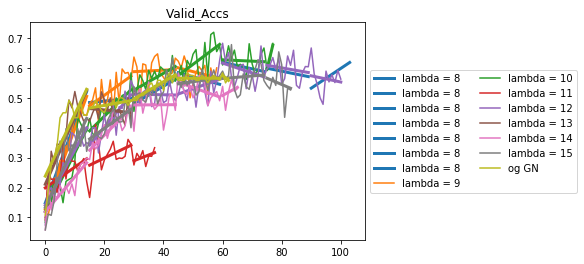

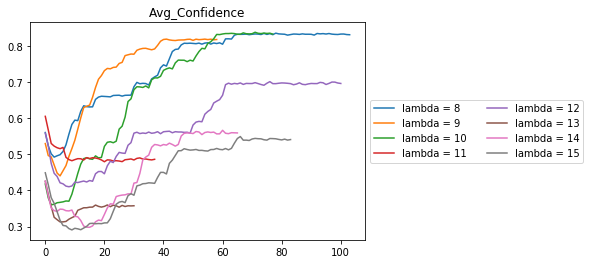

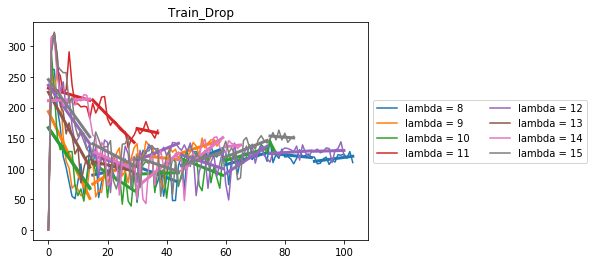

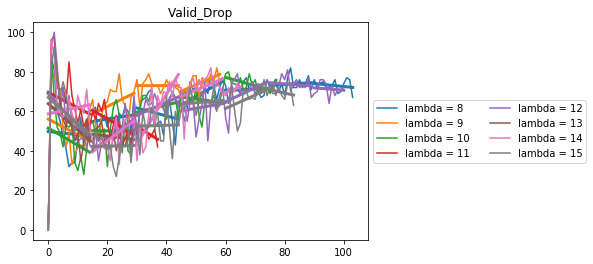

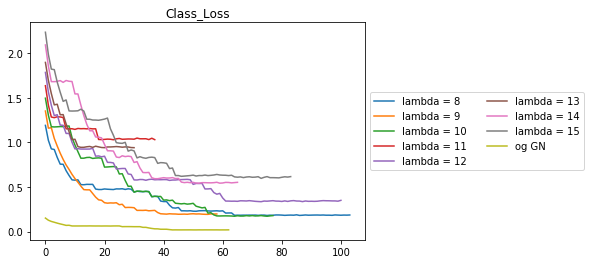

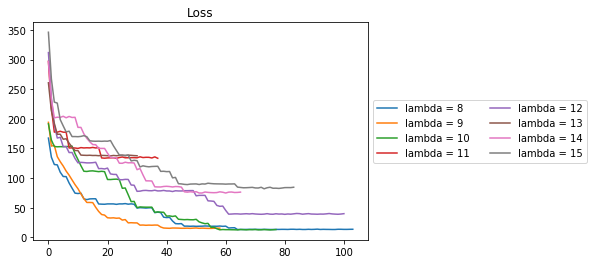

In [2]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")

name = "stats/stats-GoogleNet_5.2-13.121.json"
fname = [name.replace("121",str(i)) for i in range(127, 130)]
fname.extend([name.replace("121",str(i)) for i in range(1211, 1214)])
fname.insert(0, name.replace("121", "123"))
fname.insert(4, name.replace("121", "126"))


gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(i+8): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(i+8): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(i+8): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(i+8): gns[i]['train_drop'] for i in range(len(gns))}

valid_drop = {"lambda = "+str(i+8): gns[i]['valid_drop'] for i in range(len(gns))}

class_loss = {"lambda = "+str(i+8): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(i+8): gns[i]['loss'] for i in range(len(gns))}



Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), avg=(15, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), avg=15)
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), avg=15)
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))


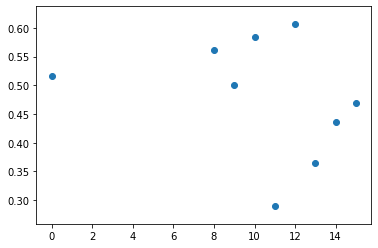

In [65]:
import matplotlib.pyplot as plt

y = [stats['TestAcc'] for stats in gns]
y.append(gn_12_441['TestAcc'])
x = [(i+8) for i in range(len(gns))]

x.append(0)
plt.scatter(x,y)



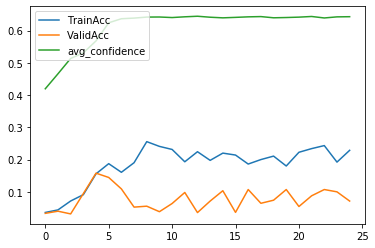

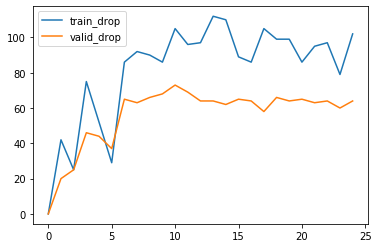

In [23]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.11.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

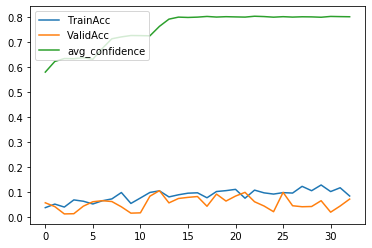

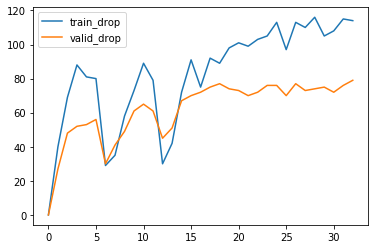

In [20]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.2.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

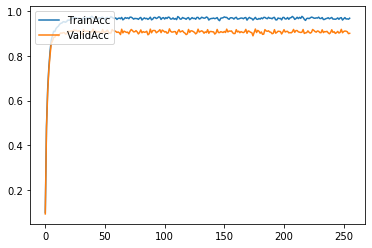

0.9105


In [16]:
ae_21_101 = load_json_from_file("stats/stats-GoogleNet_1.3-4.2.json")
train_val = {'TrainAcc': ae_21_101['TrainAcc'], 'ValidAcc': ae_21_101['ValidAcc']}
Metrics.plot_series(train_val)

print(ae_21_101['TestAcc'])

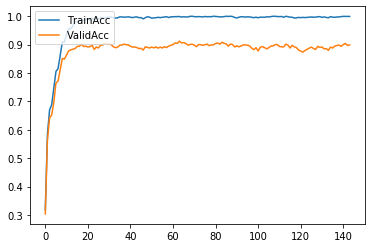

0.9128847157016171


In [17]:
ae_21_101 = load_json_from_file("stats/stats-GoogleNet_1.2-4.2.json")
train_val = {'TrainAcc': ae_21_101['TrainAcc'], 'ValidAcc': ae_21_101['ValidAcc']}
Metrics.plot_series(train_val)

print(ae_21_101['TestAcc'])